In [5]:
# Importación de librerías necesarias
import pandas as pd
import plotly.express as px

# Carga del archivo CSV
df = pd.read_csv('../vehicles_us.csv')

# Vista previa de los datos
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
condition           0
model               0
price               0
fuel                0
type                0
transmission        0
date_posted         0
days_listed         0
dtype: int64

In [9]:
# Limpieza de datos nulos

# Rellenar 'is_4wd' con 0
df['is_4wd'] = df['is_4wd'].fillna(0)

# Rellenar 'paint_color' con 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

# Eliminar filas con valores nulos en 'model_year' y 'odometer'
df = df.dropna(subset=['model_year', 'odometer'])

# Rellenar 'cylinders' con el valor más frecuente
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [10]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Conversión de tipos de datos

# Convertir a entero
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)

# Convertir a booleano
df['is_4wd'] = df['is_4wd'].astype(bool)

# Convertir a fecha
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [14]:
# Ver valores únicos
df['model_year'].sort_values().unique()

array([1908, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

Se completó una limpieza de datos exhaustiva y cuidadosa, permitiendo que el conjunto de datos esté ahora en condiciones óptimas para continuar con el análisis exploratorio y modelado posterior. Se tomaron decisiones informadas para manejar los valores ausentes sin eliminar información útil en exceso, y se confirmó la ausencia de datos duplicados. Esto asegura mayor calidad y confiabilidad para los siguientes pasos del proyecto.

Matplotlib is building the font cache; this may take a moment.


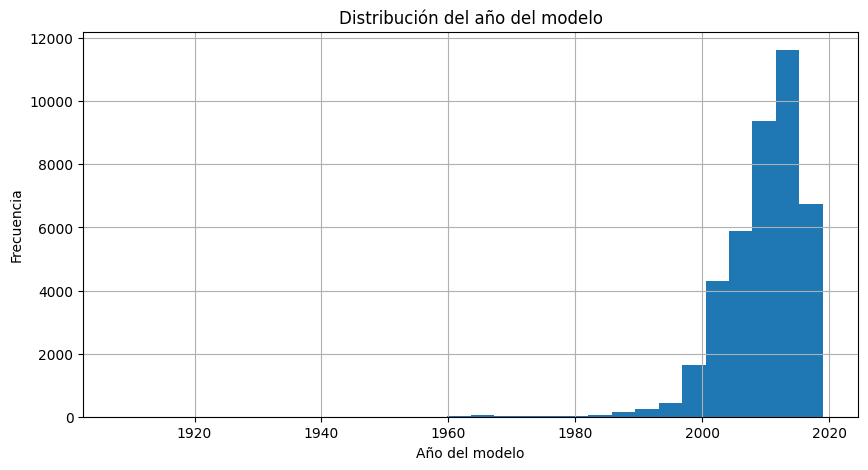

In [16]:
# Histograma para ver la distribución
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['model_year'].hist(bins=30)
plt.title('Distribución del año del modelo')
plt.xlabel('Año del modelo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La distribución está claramente sesgada hacia los vehículos modernos, lo cual es consistente con un mercado de autos usados actual. Estos resultados son útiles para segmentar los datos por rangos de años, analizar tendencias del mercado o para limpieza posterior (por ejemplo, considerar la exclusión de modelos extremadamente antiguos si se consideran no representativos).